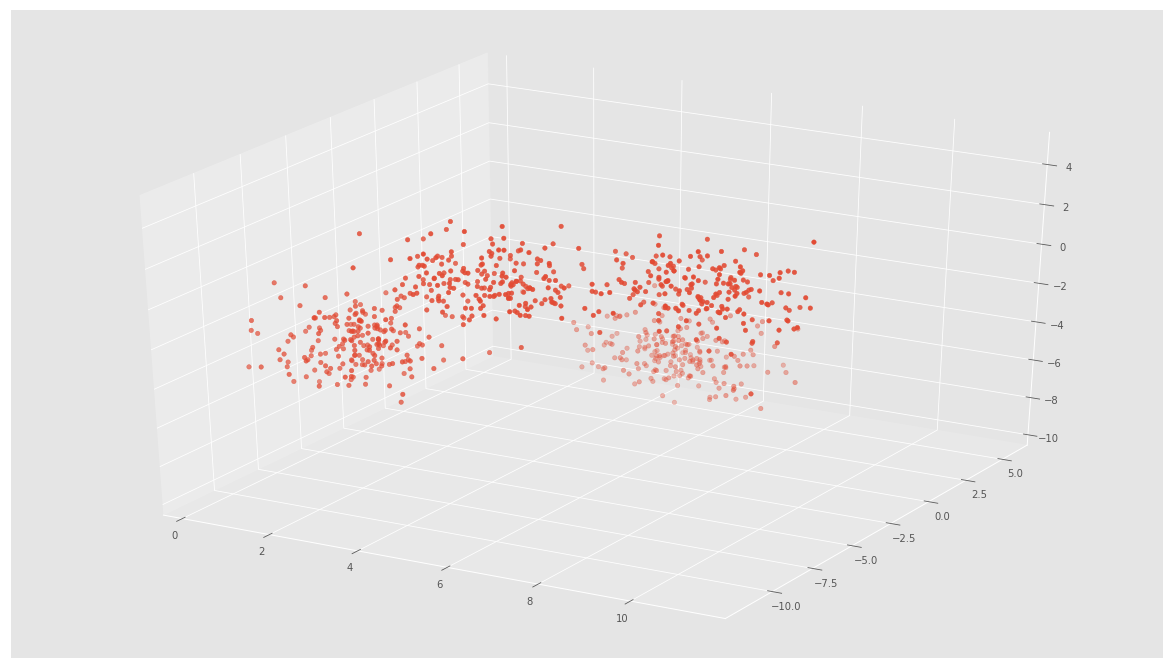

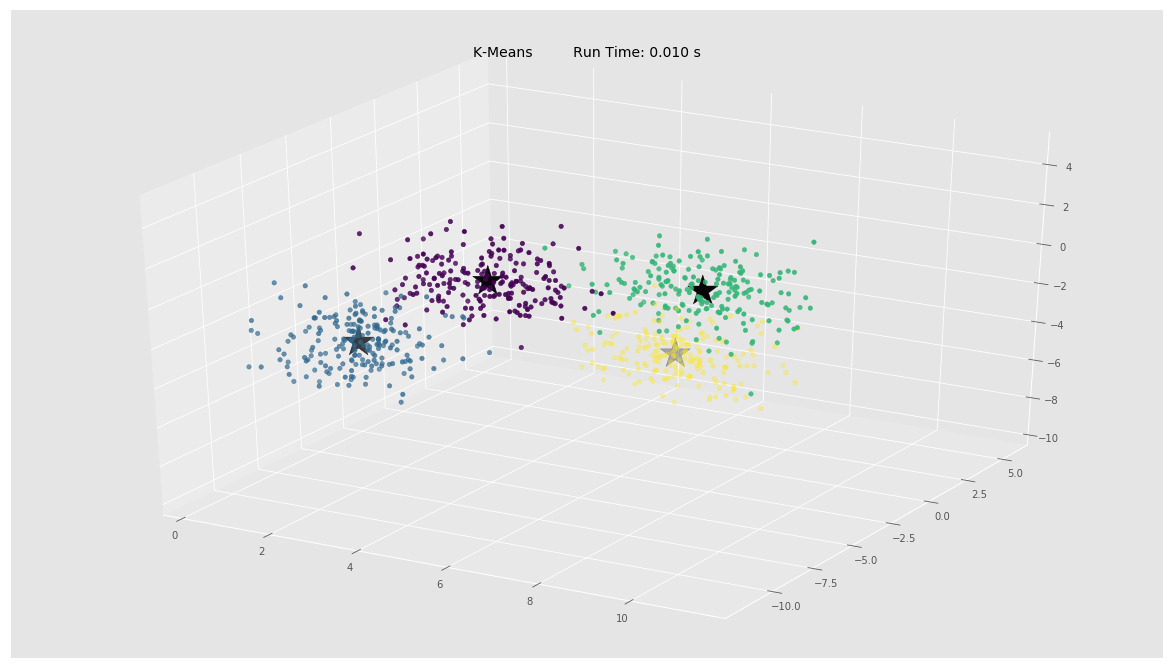

In [1]:


# K means implementation
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
fig = plt.figure()
fig
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
#starting time stamp
start_time = time.time()
# Fitting with inputs
kmeans = kmeans.fit(X)
#ending time stamp
end_time = time.time()
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

plt.title('K-Means         Run Time: {:.3f} s'.format(end_time-start_time), fontsize=14)

plt.show()



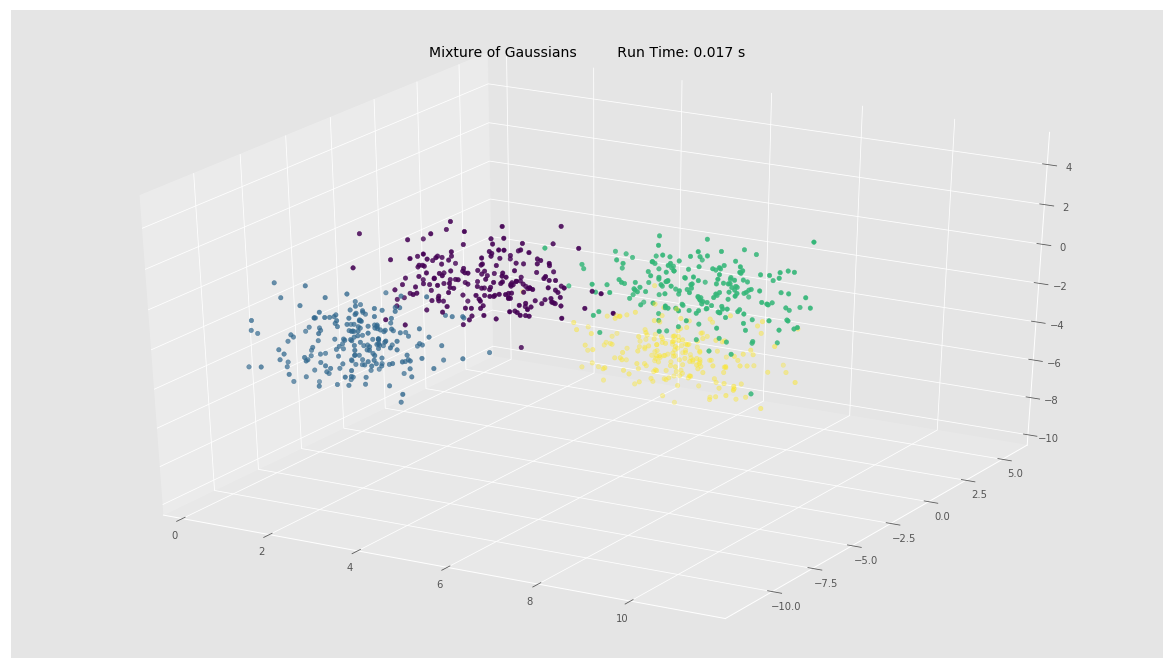

In [2]:
#EM implementation
from sklearn.mixture import GaussianMixture
start_time = time.time()
gmm = GaussianMixture(n_components=4, covariance_type='full').fit(X)
end_time = time.time()
labels = gmm.predict(X)
#plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

plt.title('Mixture of Gaussians         Run Time: {:.3f} s'.format(end_time-start_time), fontsize=14)

plt.show()

In [3]:
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation
#import matplotlib.pyplot as plt
from itertools import cycle

#making random data
#centers = [[1,1], [-1,-1], [1,-1]]
#X, y= make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

#setup Affinity Propagation
start_time = time.time()
af = AffinityPropagation(preference=-300).fit(X)
end_time = time.time()
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)


Estimated number of clusters: 4


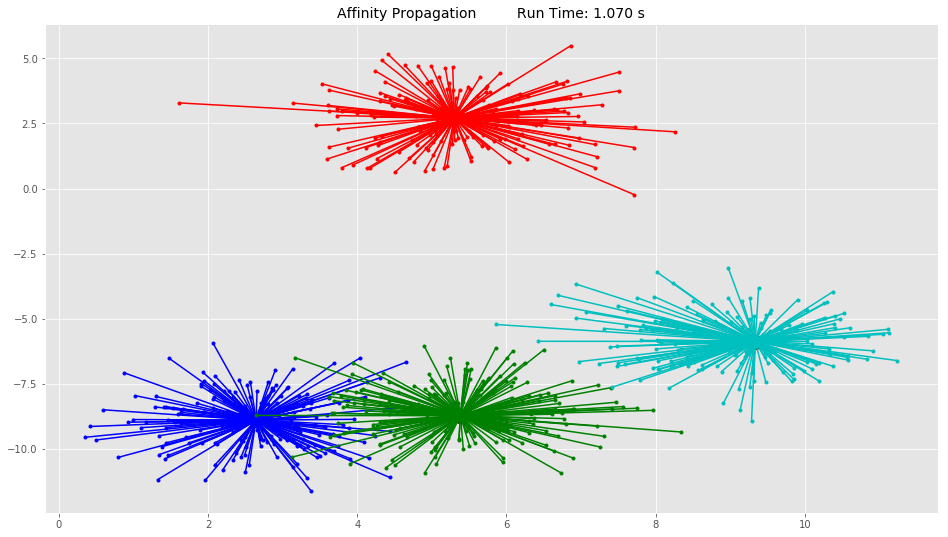

In [4]:

plt.title('Affinity Propagation         Run Time: {:.3f} s'.format(end_time-start_time), fontsize=14)
plt.show()